<a href="https://colab.research.google.com/github/kozoB/dogs-breed-classifier/blob/main/DogBreedClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Breed Classifier

# Import Dataset From Kaggle

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yxshee/dogs-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.73G/2.73G [00:32<00:00, 90.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/yxshee/dogs-dataset/versions/2


In [2]:
import shutil

# Move the dataset to the Colab working directory (/content)
destination_path = "/content/dogs-dataset"
shutil.move(path, destination_path)

print("New Path to dataset files:", destination_path)

New Path to dataset files: /content/dogs-dataset


In [9]:
images_dir = "/content/dogs-dataset/images/Images/"

# Exploratory Data Analysis And Visualization

## Plot Random Images From Dataset

In [18]:
import os, random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [14]:
# List all class directories
classes = [d for d in os.listdir(images_dir) if os.path.isdir(os.path.join(images_dir, d))]

In [15]:
classes

['n02096294-Australian_terrier',
 'n02102318-cocker_spaniel',
 'n02091032-Italian_greyhound',
 'n02113186-Cardigan',
 'n02100735-English_setter',
 'n02113799-standard_poodle',
 'n02106030-collie',
 'n02111277-Newfoundland',
 'n02101556-clumber',
 'n02099267-flat-coated_retriever',
 'n02092339-Weimaraner',
 'n02087394-Rhodesian_ridgeback',
 'n02095889-Sealyham_terrier',
 'n02113712-miniature_poodle',
 'n02087046-toy_terrier',
 'n02105641-Old_English_sheepdog',
 'n02102040-English_springer',
 'n02101388-Brittany_spaniel',
 'n02105162-malinois',
 'n02094114-Norfolk_terrier',
 'n02088364-beagle',
 'n02111889-Samoyed',
 'n02096585-Boston_bull',
 'n02109961-Eskimo_dog',
 'n02115641-dingo',
 'n02098286-West_Highland_white_terrier',
 'n02093428-American_Staffordshire_terrier',
 'n02085936-Maltese_dog',
 'n02088238-basset',
 'n02116738-African_hunting_dog',
 'n02108422-bull_mastiff',
 'n02100877-Irish_setter',
 'n02085782-Japanese_spaniel',
 'n02107142-Doberman',
 'n02097047-miniature_schnauzer

In [16]:
# Number of images to display
num_images = 5

# Randomly pick images from random classes
selected_images = []
for _ in range(num_images):
    random_class = random.choice(classes)
    class_path = os.path.join(images_dir, random_class)
    images = os.listdir(class_path)
    random_image = random.choice(images)
    selected_images.append((random_class, os.path.join(class_path, random_image)))

(375, 500, 3) n02112018-Pomeranian 562500
(400, 500, 3) n02086646-Blenheim_spaniel 600000
(350, 350, 3) n02094114-Norfolk_terrier 367500
(338, 300, 3) n02089867-Walker_hound 304200
(400, 500, 3) n02110958-pug 600000


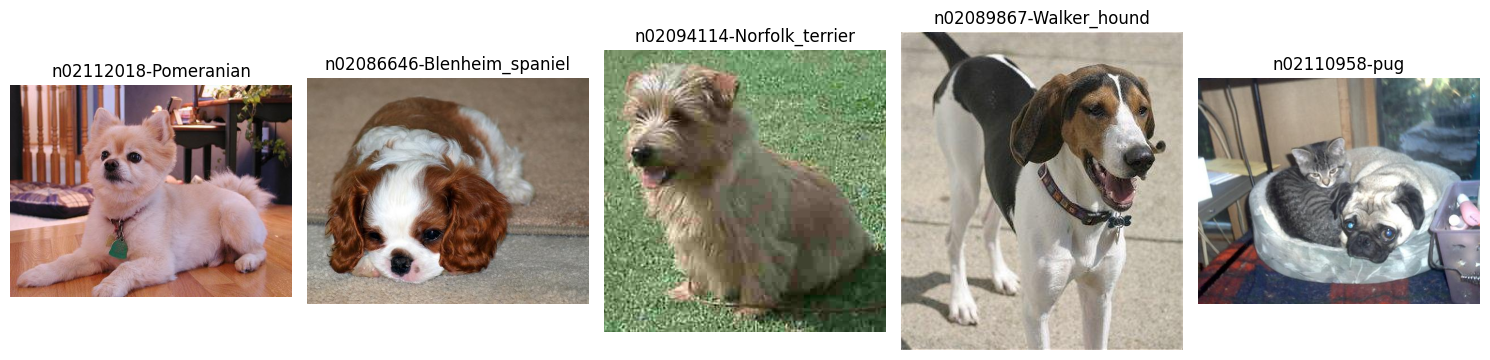

In [20]:
# Plot the selected images
plt.figure(figsize=(15, 5))
for i, (label, img_path) in enumerate(selected_images):
    img = mpimg.imread(img_path)
    plt.subplot(1, num_images, i + 1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    print(img.shape, label, img.size)
plt.tight_layout()
plt.show()

The images have various sizes and shapes.
This inconsistency will have to be dealt with in the preprocessign phase, where all of the images will be resized to a fixed size before being fed to the model

## Plot Classes Distribution And Imbalances

In [47]:
import os
import plotly.express as px

# Count the number of images in each class
class_counts = {}
for class_name in os.listdir(images_dir):
    class_path = os.path.join(images_dir, class_name)
    if os.path.isdir(class_path):  # Ensure it's a directory
        class_counts[class_name] = len(os.listdir(class_path))

# Sort the class counts for a cleaner plot
class_counts = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))

# Preprocess class labels: Split by '-' and take the last part (abbreviated if necessary)
labels = [name.split('-')[-1][:10] + "..." if len(name.split('-')[-1]) > 10 else name.split('-')[-1] for name in class_counts.keys()]

# Create the plotly chart
fig = px.bar(
    x=labels,
    y=list(class_counts.values()),
    labels={'x': 'Class', 'y': 'Number of Images'},
    title="Class Distribution"
)

# Show the interactive plot
fig.update_layout(xaxis_tickangle=45)
fig.show()


# Load Dataset Into Train and Test Sets

In [ ]:
import tensorflow as tf

In [ ]:
train_set = tf.keras.utils.image_dataset_from_directory(images_dir,
                                                        validation_split=0.2,
                                                        subset='training',
                                                        seed=42,
                                                        batch_size=32,
                                                        image_size=(224, 224)
                                                        )

Found 20580 files belonging to 120 classes.
Using 16464 files for training.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(images_dir,
                                                        validation_split=0.2,
                                                        subset='validation',
                                                        seed=42,
                                                        batch_size=32,
                                                        image_size=(224, 224)
                                                        )

Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


# Data Augmentations

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),  # Horizontal flip
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),     # Random rotation
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),         # Random zoom
    tf.keras.layers.experimental.preprocessing.RandomTranslation(0.2, 0.2), # Random translation
])

AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'experimental'

In [ ]:
tarin_set = train_set.map(lambda x, y: (data_augmentation(x, training=True), y))

# Preprocess Images

# Custom CNN Model